# Demonstration of `donut_plot_with_subgroups_from_dataframe.py`

Demonstrating use of `donut_plot_with_subgroups_from_dataframe.py`, see [here](https://github.com/fomightez/donut_plots_with_subgroups) for more information.

This is full-featured script that makes a plot similar to [the example from The Python Graph Gallery](https://python-graph-gallery.com/163-donut-plot-with-subgroups/). This script is full-featured **without further need for coding** that allows you to plug in your own data input. 

In addition to this full featured script desnonstrated on this page, there is a demonstration notebook that shows the basic coding step to make a plot similar to [the example from The Python Graph Gallery](https://python-graph-gallery.com/163-donut-plot-with-subgroups/) using a dataframe ot tabular text as input. That notebook is [here](demo_basics_from_df.ipynb). In addition to that there are some others too. Here is a list to access the basic outine and some others:

- [Demonstrate the basics](demo_basics_from_df.ipynb)
- [Demonstrate a full-featured script that plots a summary for the subgroups in addition to the donut plot with subgroups](??????)
- [Demonstrate a full-featured script that plots a summary for binary data in addition to the donut plot with the binary group broken down by a group](??????)


In the current form, these scripts and demonstration notebook work in JupyterLab, too.

## Preparation and displaying USAGE block

Let's get the script and run 'Help' on it to see the basic USAGE block.

**IS GETTING SCRIPT NECESSARY? DEMO IN SAME REPO AS SCRIPT?**

In [1]:
!curl -OL 

curl: no URL specified!
curl: try 'curl --help' or 'curl --manual' for more information


In [2]:
%run donut_plot_with_subgroups_from_dataframe.py -h

usage: donut_plot_with_subgroups_from_dataframe.py [-h] [-li] [-svg] [-ssn]
                                                   [-hll HILOLIST]
                                                   DF_FILE GROUPS SUBGROUPS

donut_plot_with_subgroups_from_dataframe.py takes a dataframe, and some
information about columns in the dataframe and makes a donut plot. FILLL IN
HERE. AND GENERALIZE COLORING SO CONISTENT ACROSS GROUPS!!! <---BACK FILL IN
OTHER TWO SCRIPTS OR AT LEAST NOT THE BINARY. CONTEMPLATE IF WILL WORK FOR
BINARY TOO. **** Script by Wayne Decatur (fomightez @ github) ***

positional arguments:
  DF_FILE               Name of file containing the dataframe. Whether it is
                        in the form of a pickled dataframe, tab-separated
                        text, or comma-separated text needs to be indicated by
                        the file extension. So `.pkl`, `.tsv`, or `.csv` for
                        the file extension.
  GROUPS                Text indicating 

## Use the script by calling it from the command line

A dataframe will be used for input data.

In [3]:
import pandas as pd
obs = [('A', 1, "frizzled"), 
       ('A', 1, "lethargic"), 
       ('A', 1, "polythene"), 
       ('A', 1, "epic"),
       ('A', 2, "frizzled"), 
       ('A', 2, "lethargic"), 
       ('A', 2, "epic"),
       ('A', 3, "frizzled"), 
       ('A', 3, "lethargic"),
       ('A', 3, "polythene"),
       ('A', 3, "epic"),
       ('A', 3, "bedraggled"),
       ('B', 1, "frizzled"), 
       ('B', 1, "lethargic"),
       ('B', 1, "polythene"),
       ('B', 1, "epic"),
       ('B', 1, "bedraggled"),
       ('B', 1, "moombahcored"),
       ('B', 2, "frizzled"), 
       ('B', 2, "lethargic"),
       ('B', 2, "polythene"),
       ('B', 2, "epic"),
       ('B', 2, "bedraggled"),
       ('C', 1, "frizzled"), 
       ('C', 1, "lethargic"),
       ('C', 1, "polythene"),
       ('C', 1, "epic"),
       ('C', 1, "bedraggled"),
       ('C', 1, "moombahcored"),
       ('C', 1, "zoned"),
       ('C', 1, "erstaz"),
       ('C', 1, "mined"),
       ('C', 1, "liberated"),
       ('C', 2, "frizzled"), 
       ('C', 2, "lethargic"),
       ('C', 2, "polythene"),
       ('C', 2, "epic"),
       ('C', 2, "bedraggled"),
       ('C', 3, "frizzled"), 
       ('C', 3, "lethargic"),
       ('C', 3, "polythene"),
       ('C', 3, "epic"),
       ('C', 3, "bedraggled"),
       ('C', 4, "bedraggled"),
       ('C', 4, "frizzled"), 
       ('C', 4, "lethargic"),
       ('C', 4, "polythene"),
       ('C', 4, "epic"),
       ('C', 5, "frizzled"), 
       ('C', 5, "lethargic"),
       ('C', 5, "polythene"),
       ('C', 5, "epic"),
       ('C', 5, "bedraggled"),
       ('C', 5, "moombahcored")]
labels = ['group', 'subgroup', 'sub-subgroup']
df = pd.DataFrame.from_records(obs, columns=labels)
df

,group,subgroup,sub-subgroup
0,A,1,frizzled
1,A,1,lethargic
2,A,1,polythene
3,A,1,epic
4,A,2,frizzled
5,A,2,lethargic
6,A,2,epic
7,A,3,frizzled
8,A,3,lethargic
9,A,3,polythene


Let's save that dataframe as tabular text and also as a Pickled pickled dataframe. The former being human readable and the latter not. The latter is more efficient at storeage though if that is an issue.

First to save as tabular text in tab-separated form. You could change it to be comma-separated, CSV, if you choose.

In [4]:
df.to_csv('data.tsv', sep='\t',index = False)

Now to save the pickled dataframe.

In [5]:
df.to_pickle("data.pkl") 

Now that we have files with input data, we have something we can point the script at for running it.

In addition to providing the data input file name, the column heading of the binary data and the column heading of the grouping set have to be provided when calling the script.

Note:No list to specify high to low intensity coloring provided and so using '1,2,3,4,5',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` opition to specify the order.


Plot image saved to: donut_plot.png


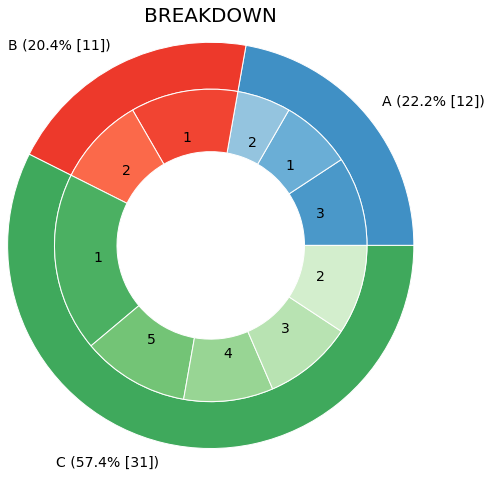

In [6]:
%run donut_plot_with_subgroups_from_dataframe data.tsv group subgroup

**NOTE:**  
In [the example from The Python Graph Gallery](https://python-graph-gallery.com/163-donut-plot-with-subgroups/) shown below the ordering of the subgroups is different.

----

![plot example](https://python-graph-gallery.com/wp-content/uploads/163_Double_Donut_Chart.png)

----

To get ordering like in the example [here](https://python-graph-gallery.com/163-donut-plot-with-subgroups/), the script can be called with the `--sort_on_subgroup_name` flag.

Note:No list to specify high to low intensity coloring provided and so using '1,2,3,4,5',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` opition to specify the order.


Plot image saved to: donut_plot.png


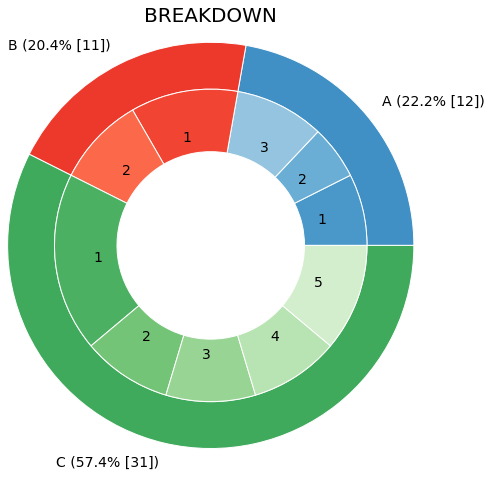

In [7]:
%run donut_plot_with_subgroups_from_dataframe data.tsv group subgroup --sort_on_subgroup_name

**Note with the addition of the** `--sort_on_subgroup_name` **the result is like the example in ordering of the subgroups** in the [the example from The Python Graph Gallery](https://python-graph-gallery.com/163-donut-plot-with-subgroups/) shown above.

The `--large_image` flag can be added to make the plot figure saved larger. 

Note:No list to specify high to low intensity coloring provided and so using '1,2,3,4,5',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` opition to specify the order.


Plot image saved to: donut_plot_larger.png


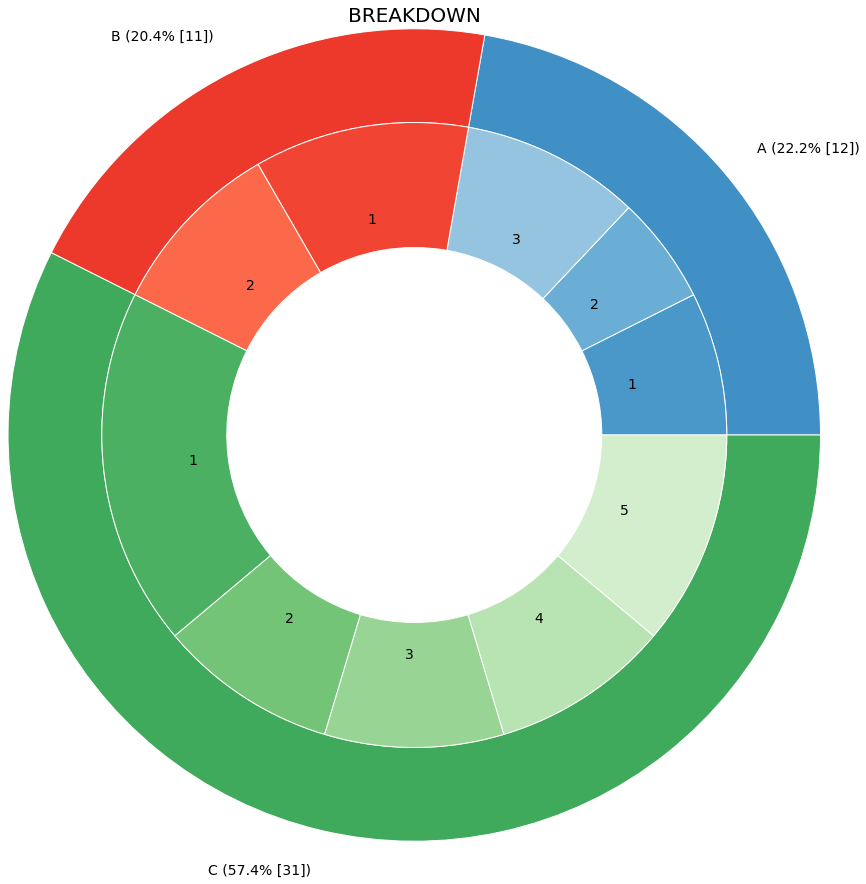

In [8]:
%run donut_plot_with_subgroups_from_dataframe data.tsv group subgroup --sort_on_subgroup_name --large_image 

You can change the size of the  image file made with the larger setting by adjusting `large_img_size ` under 'USER ADJUSTABLE VALUES' section in the script code.  
Additional customization is possible simply editing settings under the 'USER ADJUSTABLE VALUES' section in the script code file.


----

## Use script in a Jupyter notebook

This will demonstrate importing the main function into a notebook.

Note that it gives you a few more options because it exposes more control as you can set whether to include the subplot titles or adjust after generation the size of the plot, etc..

First, we'll use the files for the dataframe and tabular text saved earlier in the example. After that will move on to not using files and instead use Python objects that are in the memory of the notebook.

We will need to import the main function of the script to be active in the running notebook environment. (There is no harm to running it again even if already run in earlier sections.)

In [16]:
from donut_plot_with_subgroups_from_dataframe import donut_plot_with_subgroups_from_dataframe

Now to try using that with the files from earlier in the demonstration.

First, we'll use the tab-separated table.

It is very similar to using the script from the command line. Here, though we have to specify the input type as file or an in-memore dataframe when we call the function. Provide a file name for `df_file` for using a data file as inout. Then specify the colum with the binary data and the column to use in grouping like the following.

Note:No list to specify high to low intensity coloring provided and so using '1,2,3,4,5',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

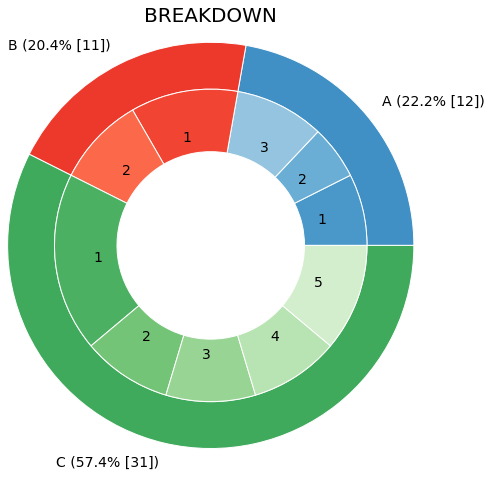

In [19]:
donut_plot_with_subgroups_from_dataframe(df_file="data.tsv",groups_col="group",subgroups_col="subgroup", sort_on_subgroup_name=True);

Note:No list to specify high to low intensity coloring provided and so using '1,2,3,4,5',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

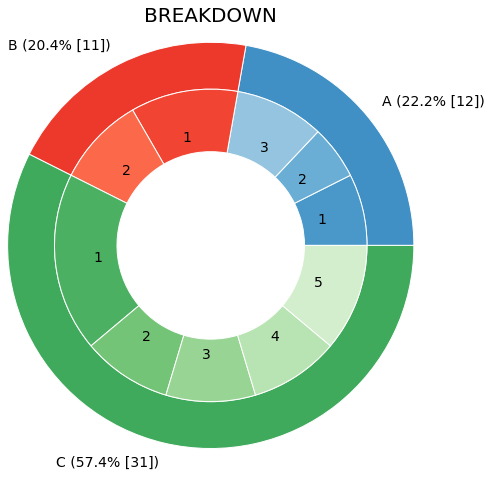

In [10]:
x = donut_plot_with_subgroups_from_dataframe(df=df, groups_col="group",subgroups_col ="subgroup",sort_on_subgroup_name=True);

Note that, similar to how the `--sort_on_subgroup_name` flag was used when calling the script as you would on the command line, `sort_on_subgroup_name=True` was also added when calling the function above to better reflect the style of the [the example from The Python Graph Gallery](https://python-graph-gallery.com/163-donut-plot-with-subgroups/) shown above..

The size of the plot can be set a couple of ways when running the script as a function.

About size, the script is run with `fig=plt.figure(figsize=(14, 4))` set by the 'default' setting `plot_figure_size`.

`plot_figure_size` can be adjusted in the script.  
Alternatively, and perhaps easier when working in Jupyter or IPython, the resulting plot can be enlarged after the fact with `x.figure.set_size_inches((28, 9))`.
(Note setting adjusting `plot_figure_size` in the current version of script to give to `fig=plt.figure(figsize=(28, 9))`and restarting kernel and running again will also give that.)

The adjusted figure can be saved as shown in the example, too.

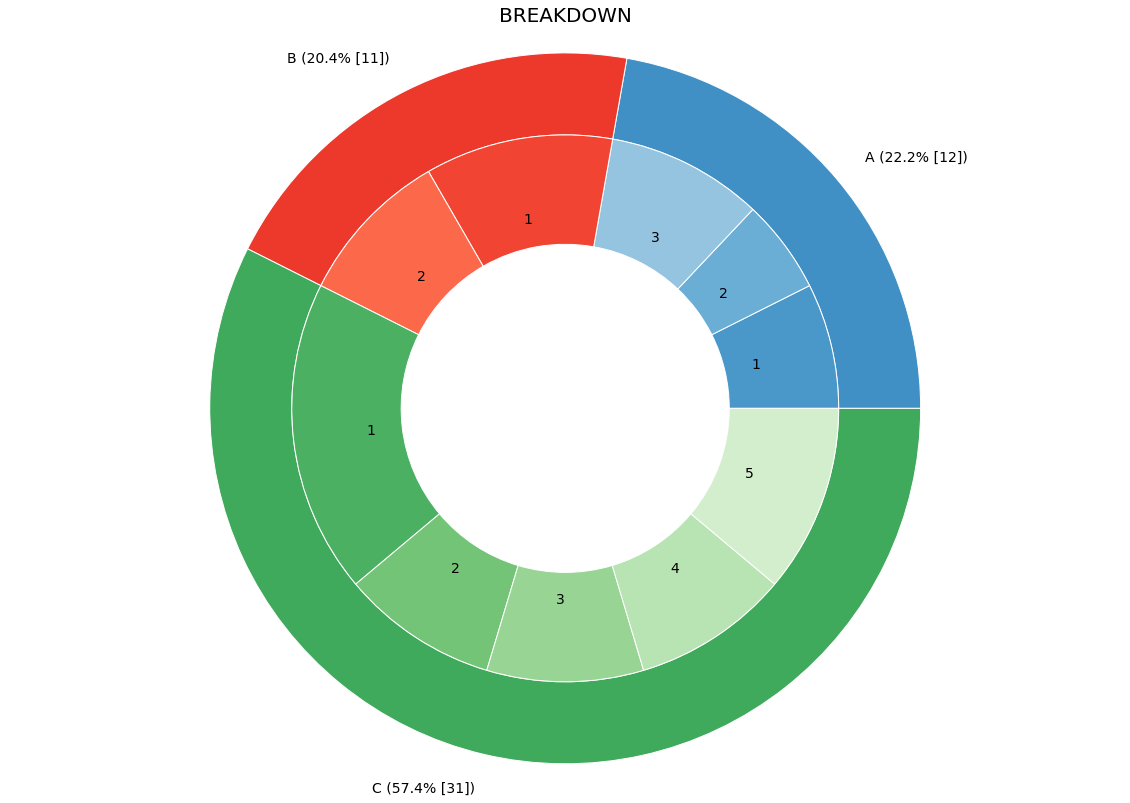

In [11]:
import matplotlib.pyplot as plt
#x.figure(figsize=(17, 11)) # Doesn't work
#plt.figure(figsize=(17, 11)) # Doesn't work
x.figure.set_size_inches((20, 14)) #<--see bottom of section at 
# https://nbviewer.jupyter.org/github/fomightez/cl_sq_demo-binder/blob/master/notebooks/Demo%20of%20script%20to%20plot%20nt%20imbalance%20for%20sequence%20span.ipynb#Use-script-in-a-Jupyter-notebook
x.figure.savefig("larger_gen_demo.png")
x.figure

That way of adjusting size doesn't change settings for all plots. As can be seen by the next cell. However, it changes size of `x` until it is reassigned and then because no size.

Note:No list to specify high to low intensity coloring provided and so using '1,2,3,4,5',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

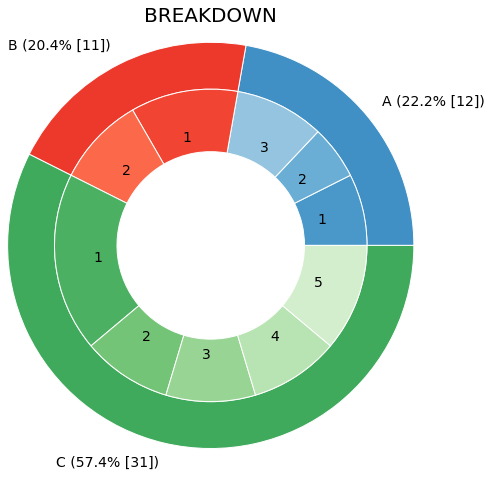

In [12]:
y = donut_plot_with_subgroups_from_dataframe(df=df, groups_col="group",subgroups_col ="subgroup",sort_on_subgroup_name=True);

----

----